# Logistic Regression


This notebook implements logistic regression, a supervised learning technique for binary classification. This regression algorithm estimates the probability that an instance belongs to a particular class. Specifically, given a set of input features, the logistic regression model produces an estimated probability of belonging to the *positive* class. If this estimated probability is at least 50%, then the instance is predicted to belong to this positive class; otherwise it is predicted to belong to the *negative* class.

---

First, load the relevant libraries needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

### The Data

A logistic regression model will be trained using the [Hawks](https://r-data.pmagunia.com/dataset/r-dataset-package-stat2data-hawks) dataset. This dataset contains observations for three species of hawks, and attributes such as age, sex, wing length, body weight, tail length, etc. 

The code block below reads the dataset into a pandas DataFrame object, subsets the DataFrame to the relevant variables, and drops any rows where there are missing values for these relevant variables.

In [ ]:
# Read in the data and subset it to the relevant columns/observations
df = pd.read_csv("../../Data/hawks.csv")
df = df[["Species", "Wing", "Tail"]].dropna(axis=0)
df

,Species,Wing,Tail
0,RT,385.0,219
1,RT,376.0,221
2,RT,381.0,235
3,CH,265.0,220
4,SS,205.0,157
...,...,...,...
903,RT,380.0,224
904,SS,190.0,150
905,RT,360.0,211
906,RT,369.0,207


Since logistic regression is for binary classification, I will only use observations for 2 of the 3 species:

1. `CH`: Cooper's
2. `SS`: Sharp-Shinned

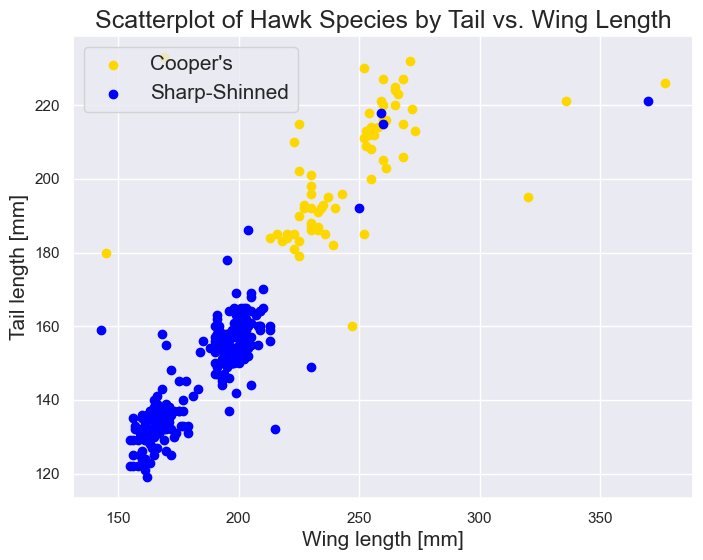

In [ ]:
#RT = df[df.Species == "RT"]
CH = df[df.Species == "CH"]
SS = df[df.Species == "SS"]

plt.figure(figsize = (8, 6))
#plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(CH.Wing, CH.Tail, color = "gold", label = "Cooper's")
plt.scatter(SS.Wing, SS.Tail, color = "blue", label = "Sharp-Shinned")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.show()

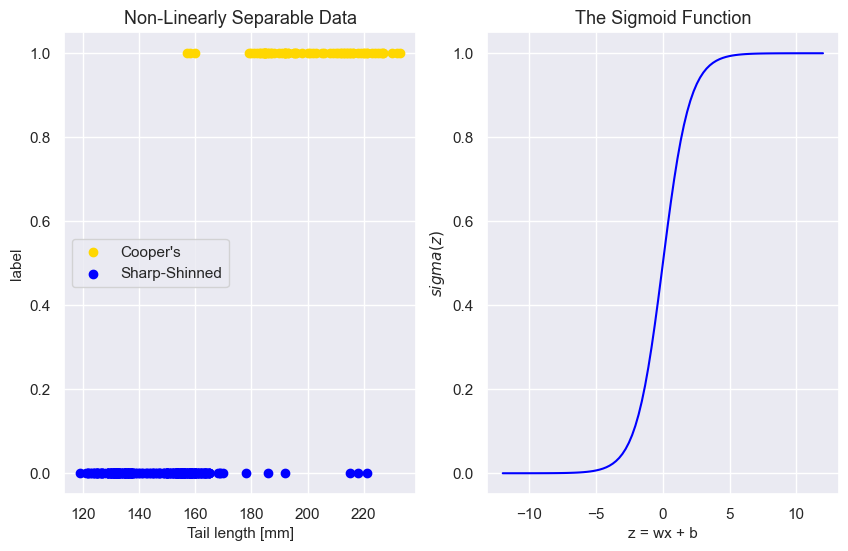

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.linspace(-12.0, 12.0, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
#ax1.set_xlim((2.75, 7))
ax1.scatter(CH.Tail, 
            np.ones(len(CH.Tail)), 
            color = "gold", 
            label = "Cooper's")
ax1.scatter(SS.Tail, 
            np.zeros(len(SS.Tail)), 
            color = "blue", 
            label = "Sharp-Shinned")
ax1.set_xlabel("Tail length [mm]", fontsize = 11)
ax1.set_ylabel("label", fontsize = 11)
ax1.set_title("Non-Linearly Separable Data", fontsize = 13)
ax1.legend(fontsize = 11, loc = "center left")

ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 11)
ax2.set_ylabel("$sigma(z)$", fontsize = 11)
ax2.set_title("The Sigmoid Function", fontsize = 13)
plt.show()

### Single Input Logistic Regression 

In [ ]:
class LogisticRegression():
    """
    A class to perform logistic regression
    """

    def __init__(self):
        self.weights = None
        self.train_errors = []
        self.rate = 0.01
        self.iterations = 0
    
    def train(self, X, y, rate=0.05, iterations=1000):
        """
        Train a logistic regression model

        Parameters
        ----------
        X: matrix of feature values
        y: array of observed values
        rate (float): learning rate
        iterations (int): number of iterations to train the model for

        Returns: None
        """
        n_obs, n_features = X.shape
        self.rate = rate
        self.iterations = iterations
        self.train_errors = []

        # Initialize coefficients/weights and intercept/bias from a uniform distribution
        self.weights = np.random.rand(n_features + 1)
        
        # Implement stochastic gradient decent
        for _ in range(iterations):
            total_error = 0
            for i in range(0, n_obs):
                err = self.predict(X[i,]) - y[i]
                self.weights -= rate * err * np.insert(X[i,], 0, 1)
                total_error += self.entropy_loss(self.predict(X[i,]), y[i])
            self.train_errors.append(total_error / n_obs)

    def sigmoid(self, z):
        """
        Implements the sigmoid function
        """
        return 1 / (1 + np.exp(-z))
    
    def entropy_loss(self, y_hat, y):
        return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
    
    def predict_prob(self, x):
        x = np.insert(x, 0, 1)
        return self.sigmoid(np.dot(x, self.weights))
    
    def predict(self, x, threshold=0.5):
        return self.predict_prob(x) >= threshold


In [ ]:
# Train the logistic regression model
data = df[df.Species != "RT"].reset_index(drop = True)
X = np.array(data[["Tail"]])
y = (data["Species"] == "CH").astype(int)

lr = LogisticRegression()
lr.train(X, y, 0.0001, 5000)

/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_1649/140101377.py:49: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/vw/11tt08k53x3ftj1j70zwt66c0000gn/T/ipykernel_1649/140101377.py:49: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


ValueError: shapes (331,) and (2,) not aligned: 331 (dim 0) != 2 (dim 0)

In [ ]:
lr.weights

array([-3.77986648,  0.02280427])

In [ ]:
# Make predictions on the testing data
y_pred = [lr.predict(x) for x in X]

#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Calculate the accuracy score and confusion matrix
accuracy = accuracy_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9606060606060606
Confusion Matrix:
 [[251  10]
 [  3  66]]


I need to make this plot later.

```
X_new = np.linspace(100, 250, 1000).reshape(-1, 1)
y_proba = lr.predict_prob(X_new)
plt.plot(X_new, y_proba, "y-", label="Cooper's") 
plt.plot(X_new, y_proba, "b--", label="Sharp-shinned")
plt.legend(fontsize = 10, loc = "center left")
plt.xlabel("Tail length [mm]", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title("Probability of hawk species given tail length", fontsize = 14)
plt.show()
```

### Using scikit-learn

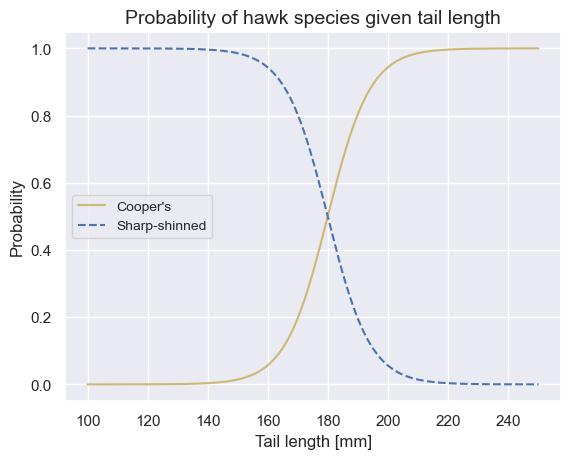

In [ ]:
from sklearn.linear_model import LogisticRegression as skLogisticRegression

log_reg = skLogisticRegression()
data = df[df.Species != "RT"]
X = data["Tail"].values.reshape(-1, 1)
y = (data["Species"] == "CH").astype(int)
log_reg.fit(X, y)

X_new = np.linspace(100, 250, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "y-", label="Cooper's") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Sharp-shinned")
plt.legend(fontsize = 10, loc = "center left")
plt.xlabel("Tail length [mm]", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title("Probability of hawk species given tail length", fontsize = 14)
plt.show()

In [ ]:
log_reg.intercept_, log_reg.coef_

(array([-25.34432173]), array([[0.14090759]]))